In [1]:
from yahoo_fin.stock_info import get_data
from datetime import date
import plotly.express as px
import pandas as pd
import numpy as np
from pathlib import Path
import csv
import seaborn as sns
from MCForecastTools import MCSimulation
%matplotlib inline


today = date.today()
spy = get_data("spy", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
xle = get_data("xle", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
gold = get_data("GLD", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
tlt = get_data("tlt", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
usd = get_data("tlt", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")


Bad key "text.kerning_factor" on line 4 in
/Users/lucasshaiman/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# @TODO: Set file paths for btc_data.csv and eth_data.csv
btc_filepath = Path('Resources/BTC-USD.csv')
btc_df = pd.read_csv(btc_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

btc_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
btc_df.sort_index(inplace=True)
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [4]:
eth_filepath = Path('Resources/ETH-USD.csv')
eth_df = pd.read_csv(eth_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

eth_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [5]:
#fig = px.line(spy['close'], labels={ 'close' : 'SPY CLOSE'})
#fig.show()

In [6]:
#gold.head()

In [7]:
#dxy = get_data("dxy", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
#dxy['close'].plot(figsize=(20,10))

In [8]:
column = ['BTC', 'ETH', 'SPY', 'XLE', 'GLD', 'TLT']

combined_df = pd.concat([btc_df['Close'], eth_df['Close'], spy['close'], xle['close'], gold['close'], tlt['close']], axis="columns", join="inner")
combined_df.columns = (['BTC', 'ETH', 'SPY', 'XLE', 'GLD', 'TLT'])
combined_df.head()

,BTC,ETH,SPY,XLE,GLD,TLT
2015-08-07,279.584991,2.772120,207.949997,67.029999,104.650002,124.339996
2015-08-10,264.470001,0.708448,210.570007,69.169998,105.720001,122.800003
2015-08-11,270.385986,1.067860,208.669998,69.300003,106.260002,124.750000
2015-08-12,266.376007,1.217440,208.919998,70.559998,107.750000,124.070000
2015-08-13,264.079987,1.827670,208.660004,69.489998,106.860001,123.669998


In [9]:
combined_df.isnull().sum()

BTC    5
ETH    5
SPY    0
XLE    0
GLD    0
TLT    0
dtype: int64

In [10]:
combined_df

,BTC,ETH,SPY,XLE,GLD,TLT
2015-08-07,279.584991,2.772120,207.949997,67.029999,104.650002,124.339996
2015-08-10,264.470001,0.708448,210.570007,69.169998,105.720001,122.800003
2015-08-11,270.385986,1.067860,208.669998,69.300003,106.260002,124.750000
2015-08-12,266.376007,1.217440,208.919998,70.559998,107.750000,124.070000
2015-08-13,264.079987,1.827670,208.660004,69.489998,106.860001,123.669998
2015-08-14,265.679993,1.827870,209.419998,69.339996,106.849998,123.959999
2015-08-17,257.976013,1.203610,210.589996,69.489998,107.129997,124.519997
2015-08-18,211.078995,1.087050,209.979996,69.230003,107.110001,123.540001
2015-08-19,226.684006,1.258860,208.320007,67.320000,108.550003,124.760002
2015-08-20,235.350006,1.464920,203.970001,65.800003,110.440002,126.019997


In [11]:
index_names = [
["BTC", "ETH",  "SPY",  "XLE",  "GLD",  "TLT"],
["close", "close","close","close","close","close"]
]
index_tuples = list(zip(*index_names))
new_index = pd.MultiIndex.from_tuples(index_tuples,names=["first", "second"])
combined_df.columns = new_index

In [12]:
combined_df.head()

first,BTC,ETH,SPY,XLE,GLD,TLT
second,close,close,close,close,close,close
2015-08-07,279.584991,2.772120,207.949997,67.029999,104.650002,124.339996
2015-08-10,264.470001,0.708448,210.570007,69.169998,105.720001,122.800003
2015-08-11,270.385986,1.067860,208.669998,69.300003,106.260002,124.750000
2015-08-12,266.376007,1.217440,208.919998,70.559998,107.750000,124.070000
2015-08-13,264.079987,1.827670,208.660004,69.489998,106.860001,123.669998


In [ ]:
index_tuples

In [13]:
portfolio_returns  = combined_df.dropna()

In [14]:
portfolio_returns.isnull().sum()

first  second
BTC    close     0
ETH    close     0
SPY    close     0
XLE    close     0
GLD    close     0
TLT    close     0
dtype: int64

In [15]:
portfolio_returns = portfolio_returns.pct_change()

In [16]:
portfolio_returns  = portfolio_returns.dropna()

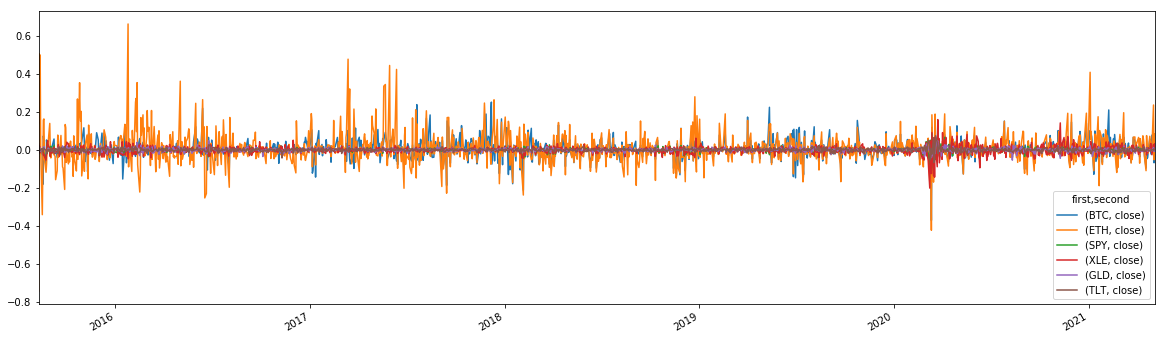

In [17]:
portfolio_returns.plot(figsize=(20,6))

In [18]:
portfolio_returns.describe()

first,BTC,ETH,SPY,XLE,GLD,TLT
second,close,close,close,close,close,close
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,0.004799,0.008349,0.000551,0.000041,0.000364,0.000119
std,0.046724,0.081419,0.011801,0.020487,0.008831,0.008719
min,-0.371695,-0.744438,-0.109424,-0.201412,-0.053694,-0.066683
25%,-0.013140,-0.025699,-0.003187,-0.008373,-0.004481,-0.004776
50%,0.002954,0.000753,0.000630,-0.000128,0.000557,0.000474
75%,0.022807,0.035776,0.005587,0.008613,0.004937,0.004837
max,0.252472,0.664770,0.090603,0.160373,0.049038,0.075196


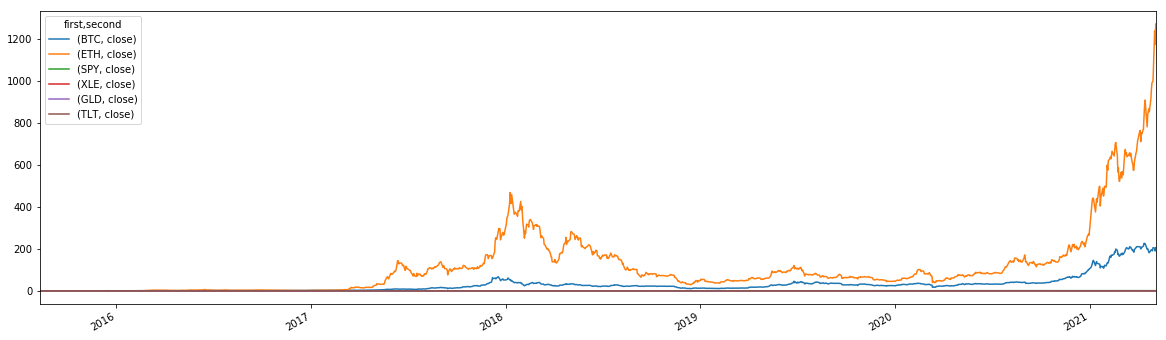

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,6))

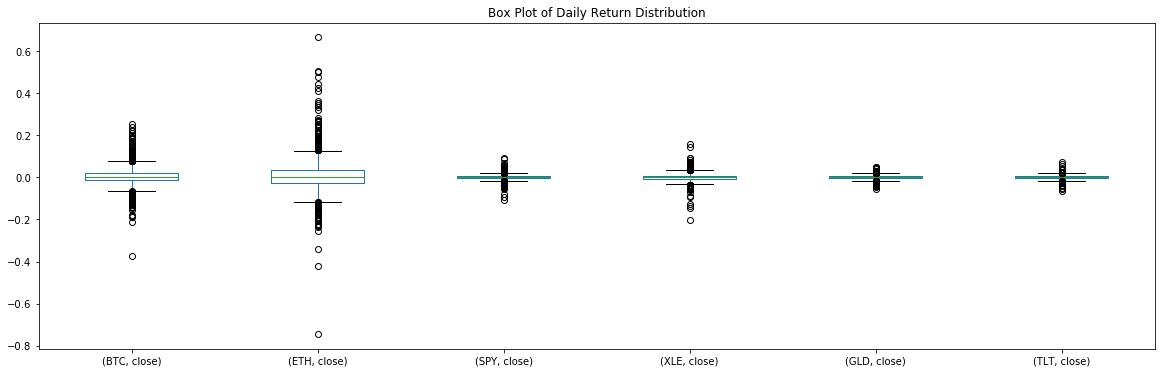

In [20]:
portfolio_returns.plot(kind='box',figsize=(20,6),title="Box Plot of Daily Return Distribution")

In [21]:
volatility = portfolio_returns.std()
volatility

first  second
BTC    close     0.046724
ETH    close     0.081419
SPY    close     0.011801
XLE    close     0.020487
GLD    close     0.008831
TLT    close     0.008719
dtype: float64

In [22]:
volatility = portfolio_returns.std() * np.sqrt(252)
volatility

first  second
BTC    close     0.741721
ETH    close     1.292482
SPY    close     0.187340
XLE    close     0.325214
GLD    close     0.140186
TLT    close     0.138411
dtype: float64

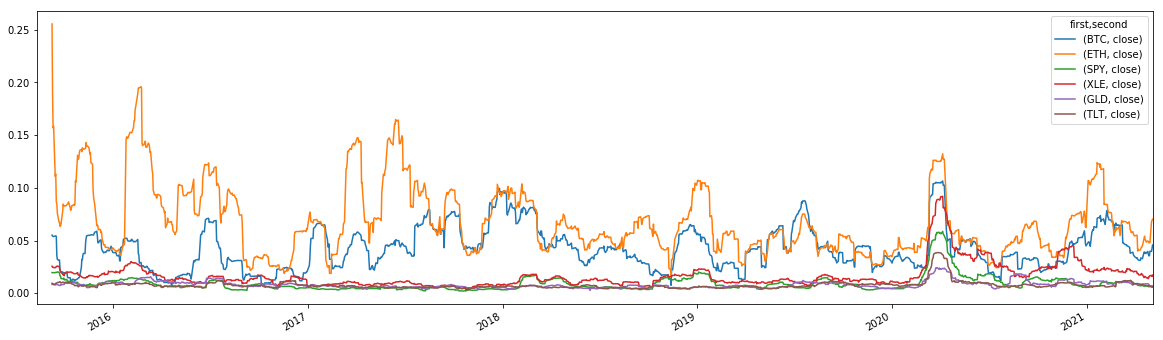

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll = portfolio_returns.rolling(window=21).std()
# Plot the rolling standard deviation
portfolio_returns.rolling(window=21).std().plot(figsize=(20,6))

In [24]:
# Calculate the correlation
price_correlation = portfolio_returns.corr()
# Display de correlation matrix
price_correlation

,first,BTC,ETH,SPY,XLE,GLD,TLT
,second,close,close,close,close,close,close
first,second,,,,,,
BTC,close,1.000000,0.478717,0.142542,0.118354,0.104796,-0.029885
ETH,close,0.478717,1.000000,0.111941,0.082284,0.084387,-0.006073
SPY,close,0.142542,0.111941,1.000000,0.718332,-0.007816,-0.394084
XLE,close,0.118354,0.082284,0.718332,1.000000,-0.015398,-0.342205
GLD,close,0.104796,0.084387,-0.007816,-0.015398,1.000000,0.325467
TLT,close,-0.029885,-0.006073,-0.394084,-0.342205,0.325467,1.000000


In [25]:
# Use `ewm` to calculate the rolling window

portfolio_returns.ewm(halflife=21).mean().head()

first,BTC,ETH,SPY,XLE,GLD,TLT
second,close,close,close,close,close,close
2015-08-10,-0.054062,-0.744438,0.012599,0.031926,0.010225,-0.012385
2015-08-11,-0.015216,-0.108229,0.001610,0.016655,0.007624,0.001980
2015-08-12,-0.015083,-0.022715,0.001468,0.017181,0.009827,-0.000579
2015-08-13,-0.013386,0.114829,0.000756,0.008690,0.005079,-0.001273
2015-08-14,-0.009236,0.090346,0.001372,0.006375,0.003975,-0.000501


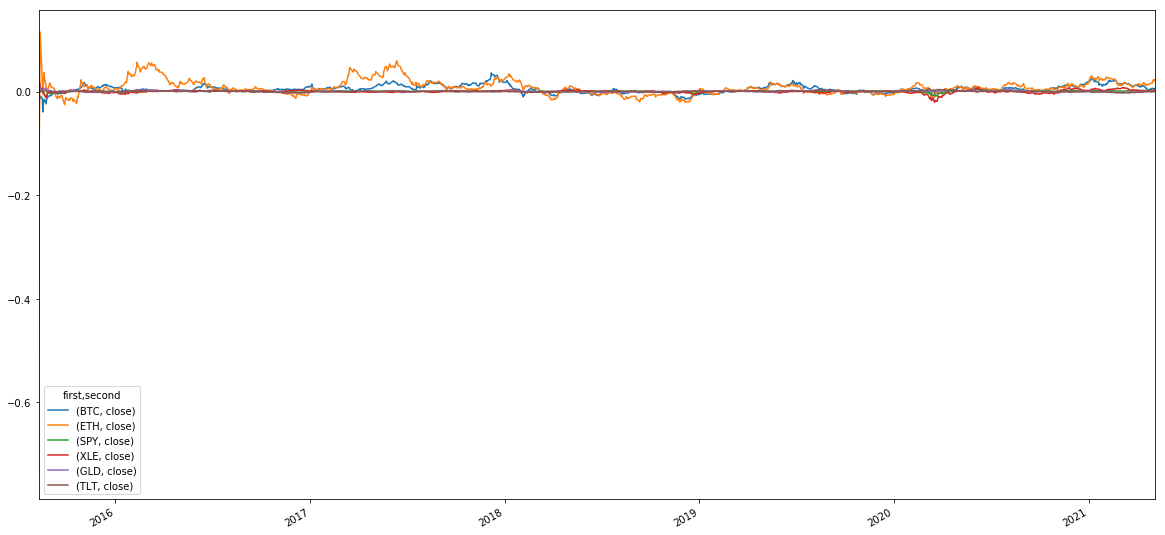

In [26]:
portfolio_returns.ewm(halflife=21).mean().plot(figsize=(20, 10))

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios


first  second
BTC    close     1.630564
ETH    close     1.627823
SPY    close     0.741086
XLE    close     0.032084
GLD    close     0.655217
TLT    close     0.216178
dtype: float64

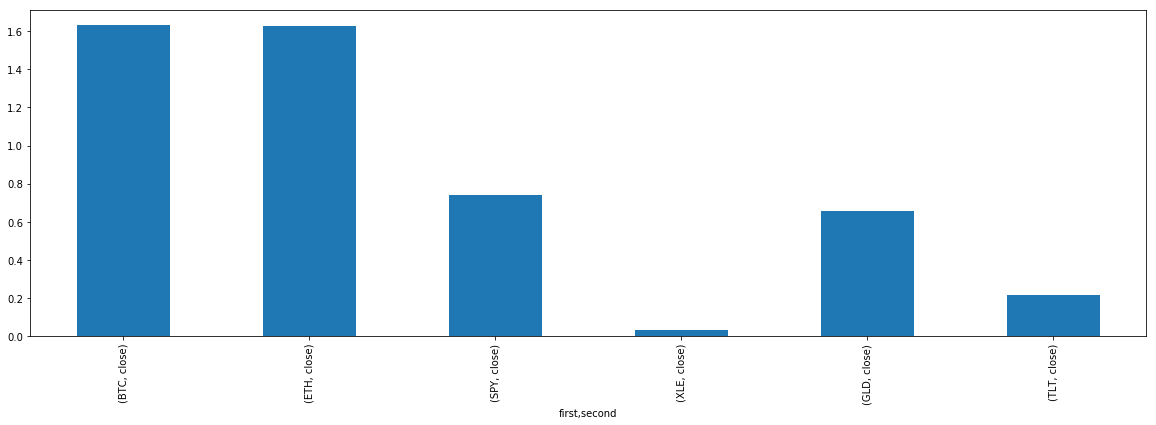

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',figsize=(20,6))

In [29]:
# Calculate and plot the correlation
price_correlation_new = portfolio_returns.corr()
# Display de correlation matrix
price_correlation_new

,first,BTC,ETH,SPY,XLE,GLD,TLT
,second,close,close,close,close,close,close
first,second,,,,,,
BTC,close,1.000000,0.478717,0.142542,0.118354,0.104796,-0.029885
ETH,close,0.478717,1.000000,0.111941,0.082284,0.084387,-0.006073
SPY,close,0.142542,0.111941,1.000000,0.718332,-0.007816,-0.394084
XLE,close,0.118354,0.082284,0.718332,1.000000,-0.015398,-0.342205
GLD,close,0.104796,0.084387,-0.007816,-0.015398,1.000000,0.325467
TLT,close,-0.029885,-0.006073,-0.394084,-0.342205,0.325467,1.000000


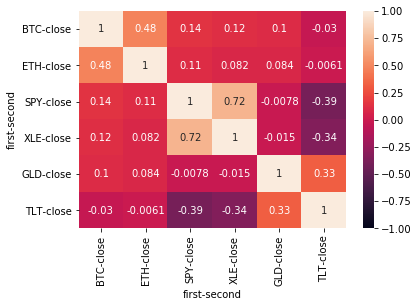

In [30]:
sns.heatmap(price_correlation_new, vmin=-1, vmax=1,annot=True)

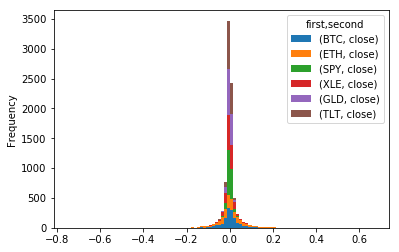

In [31]:
# Distribution Histogram

portfolio_returns.plot.hist(stacked=True, bins=100)



In [32]:
# Set weights
weights = [0,0,1/4,1/4,1/4,1/4]

# Calculate portfolio return

portfolio_returns_weight= portfolio_returns.dot(weights)
# portfolio_returns_new.set_index('Date')

portfolio_returns_weight.dropna()

# Display sample data
portfolio_returns_weight.head()

2015-08-10    0.010591
2015-08-11    0.003461
2015-08-12    0.006988
2015-08-13   -0.006973
2015-08-14    0.000934
dtype: float64

In [33]:
weights_2 = [5,5,45,0,0,45]

In [34]:
portfolio_returns_weight_2 = portfolio_returns.dot(weights_2)

In [35]:
portfolio_returns_weight_2.head()

2015-08-10   -3.982877
2015-08-11    2.956994
2015-08-12    0.434842
2015-08-13    2.262023
2015-08-14    0.300266
dtype: float64

In [36]:
combined_df.head()

first,BTC,ETH,SPY,XLE,GLD,TLT
second,close,close,close,close,close,close
2015-08-07,279.584991,2.772120,207.949997,67.029999,104.650002,124.339996
2015-08-10,264.470001,0.708448,210.570007,69.169998,105.720001,122.800003
2015-08-11,270.385986,1.067860,208.669998,69.300003,106.260002,124.750000
2015-08-12,266.376007,1.217440,208.919998,70.559998,107.750000,124.070000
2015-08-13,264.079987,1.827670,208.660004,69.489998,106.860001,123.669998


In [37]:
MC_thirty_weights_2 = MCSimulation(
    combined_df,
    weights = [.5,.5,.45,0,0,.45],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [ ]:
MC_thirty_weights_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si